<a href="https://colab.research.google.com/github/AlfinMasHo/TA_Data_Mining/blob/main/TA_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kanker paru-paru, juga dikenal sebagai karsinoma paru-paru, adalah tumor ganas paru-paru yang ditandai dengan pertumbuhan sel yang tidak terkendali di jaringan paru-paru. Pertumbuhan ini dapat menyebar ke luar paru melalui proses metastasis ke jaringan terdekat atau bagian tubuh lainnya.

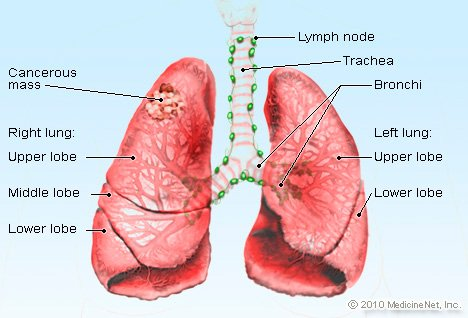

Dalam penelitian ini, saya mencoba untuk memprediksi Kanker Paru menggunakan 6 algoritma yang berbeda:

1. Logistic regression classification
2. SVM (Support Vector Machine) 
3. classification
4. Naive bayes classification
5. Decision tree classification
6. Random forest classification
7. K-Nearest Neighbor classification

Variabel prediktor yang digunakan dalam mengklasifikasikan kanker paru-paru:

1. Age
2. Smokes
3. AreaQ
4. Alkhohol

Import Library

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Data

In [11]:
data = pd.read_csv('lung_cancer_examples.csv')
print('Dataset :',data.shape)
data.info()
data[0:10]

Dataset : (59, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


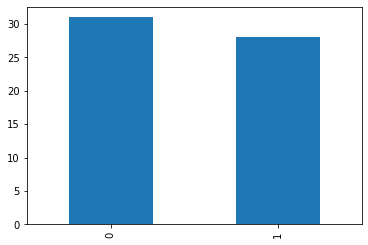

In [12]:
# Distribution of diagnosis
data.Result.value_counts()[0:30].plot(kind='bar')
plt.show()

Visualisasi Data

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


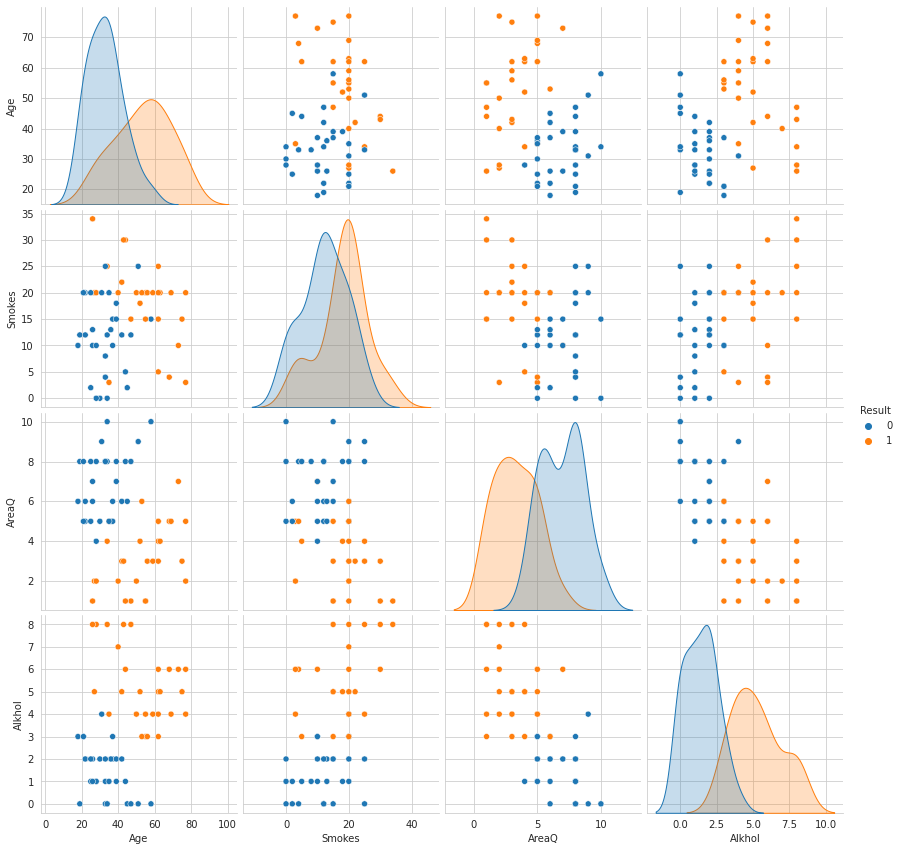

In [13]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="Result",size=3);
plt.show()

Menghilangkan Variabel Yang Tidak Relevan Dalam Analisis Seperti Nama, Nama Keluarga

In [14]:
data1 = data.drop(columns=['Name','Surname'],

                 axis=1)
data1 = data1.dropna(how='any')
print(data1.shape)

(59, 5)


In [15]:
print(data1.shape)
data1.head()

(59, 5)


,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


Data untuk pelatihan dan pengujian

Untuk memilih sekumpulan data latih yang akan diinput pada algoritma Machine Learning, untuk memastikan bahwa pelatihan algoritma klasifikasi dapat digeneralisasikan dengan baik ke data baru. Untuk penelitian ini menggunakan ukuran sampel 10%, diasumsikan rasio ideal antara pelatihan dan pengujian

In [17]:
from sklearn.model_selection import train_test_split
Y = data1['Result']
X = data1.drop(columns=['Result'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=9)

In [18]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (53, 4)
Y train shape:  (53,)
X test shape:  (6, 4)
Y test shape:  (6,)


1. Logistic regression classification

Regresi logistik adalah teknik yang dapat diterapkan pada masalah klasifikasi biner. Teknik ini menggunakan fungsi logistik atau fungsi sigmoid, yang merupakan kurva berbentuk S yang dapat mengasumsikan bilangan real apa pun dan menetapkannya ke nilai antara 0 dan 1, tetapi tidak pernah tepat dalam batas tersebut. Dengan demikian, model regresi logistik probabilitas kelas default (probabilitas bahwa input (X) milik kelas default (Y=1) ) (P(X)=P(Y=1|X)) . Untuk membuat prediksi probabilitas, digunakan fungsi logistik, yang memungkinkan kita untuk mendapatkan log-odds atau probit. Jadi, modelnya adalah kombinasi linier dari input, tetapi kombinasi linier ini berhubungan dengan log-odds dari kelas default.

Dimulai dari membuat instance model yang mengatur nilai default. Tentukan kebalikan dari kekuatan regularisasi dalam 10. Melatih model regresi logistik dengan data pelatihan, dan kemudian menerapkan model tersebut ke data uji.

In [19]:
from sklearn.linear_model import LogisticRegression

# We defining the model
logreg = LogisticRegression(C=10)

# We train the model
logreg.fit(X_train, Y_train)

# We predict target values
Y_predict1 = logreg.predict(X_test)

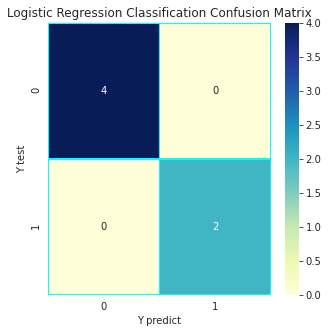

In [20]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [21]:
# Test score
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

1.0


2. SVM (Support Vector Machine) classification

SVM (Support Vector Machine) telah menunjukkan proliferasi yang cepat selama beberapa tahun terakhir. Pengaturan masalah pembelajaran untuk SVM sesuai dengan beberapa ketergantungan yang tidak diketahui dan nonlinier (pemetaan, fungsi) y=f(x) antara beberapa vektor input dimensi tinggi x dan output skalar y . Perlu dicatat bahwa tidak ada informasi tentang fungsi probabilitas bersama, oleh karena itu, pembelajaran distribusi gratis harus dilakukan. Satu-satunya informasi yang tersedia adalah kumpulan data pelatihan D=(xi,yi)∈X×Y,i=1 , l , di mana l menyatakan jumlah pasangan data pelatihan dan oleh karena itu sama dengan ukuran kumpulan data pelatihan D , tambahan, yi dilambangkan sebagai di , di mana d berarti nilai (target) yang diinginkan. Oleh karena itu, SVM termasuk dalam teknik pembelajaran yang diawasi.

Dari pendekatan klasifikasi, tujuan SVM adalah menemukan hyperplane dalam ruang N-dimensi yang secara jelas mengklasifikasikan titik-titik data. Jadi hyperplanes adalah batas keputusan yang membantu mengklasifikasikan titik data. Titik data yang jatuh di kedua sisi hyperplane dapat dikaitkan dengan kelas yang berbeda.

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# We define the SVM model
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), 
                                               n_jobs=-1))

# We train model
svmcla.fit(X_train, Y_train)

# We predict target values
Y_predict2 = svmcla.predict(X_test)

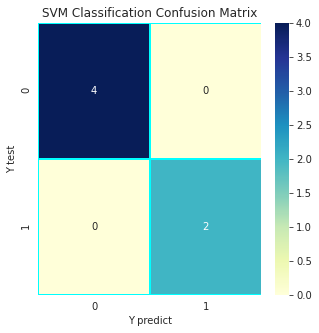

In [23]:
# The confusion matrix
svmcla_cm = confusion_matrix(Y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [24]:
# Test score
score_svmcla = svmcla.score(X_test, Y_test)
print(score_svmcla)

1.0


3. Naive bayes classification

Pengklasifikasi Bayesian naaive adalah pengklasifikasi probabilistik berdasarkan teorema Bayes dengan asumsi independensi yang kuat antara fitur. Jadi, dengan menggunakan teorema Bayes (P(X|Y)=P(Y|X)P(X)P(Y)) , kita dapat menemukan probabilitas X terjadi, mengingat Y telah terjadi. Di sini, Y adalah bukti dan X adalah hipotesis. Asumsi yang dibuat di sini adalah bahwa kehadiran satu fitur tertentu tidak mempengaruhi yang lain (prediktor/fiturnya independen). Makanya disebut naif. Dalam hal ini kita akan berasumsi bahwa kita menganggap nilai-nilai tersebut diambil dari distribusi Gaussian dan oleh karena itu kita menganggapnya sebagai Gaussian Naive Bayes.

In [25]:
from sklearn.naive_bayes import GaussianNB

# We define the model
nbcla = GaussianNB()

# We train model
nbcla.fit(X_train, Y_train)

# We predict target values
Y_predict3 = nbcla.predict(X_test)

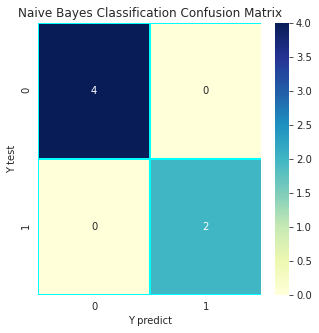

In [26]:
# The confusion matrix
nbcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [27]:
# Test score
score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

1.0


4. Decision tree classification

decision tree adalah struktur pohon seperti diagram alur di mana simpul internal mewakili fitur, cabang mewakili aturan keputusan, dan setiap simpul daun mewakili hasilnya. Pohon keputusan menganalisis sekumpulan data untuk membangun seperangkat aturan atau pertanyaan, yang digunakan untuk memprediksi kelas, yaitu, tujuan pohon keputusan adalah membuat model yang memprediksi nilai variabel target dengan mempelajari aturan keputusan sederhana. disimpulkan dari fitur data. Dalam pengertian ini pohon keputusan memilih atribut terbaik yang digunakan untuk membagi catatan, mengubah atribut itu menjadi simpul keputusan dan membagi kumpulan data menjadi himpunan bagian yang lebih kecil, untuk akhirnya memulai pembangunan pohon dengan mengulangi proses ini secara rekursif.

In [28]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(X_train, Y_train)

# We predict target values
Y_predict4 = dtcla.predict(X_test)

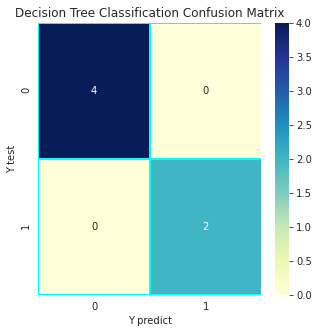

In [30]:
# The confusion matrix
dtcla_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [31]:
# Test score
score_dtcla = dtcla.score(X_test, Y_test)
print(score_dtcla)

1.0


5. Random forest classification

Berdasarkan metode klasifikasi sebelumnya, random forest adalah algoritma pembelajaran terawasi yang membuat hutan secara acak. Hutan ini, adalah sekumpulan pohon keputusan, yang seringkali dilatih dengan metode bagging. Ide penting dari bagging adalah untuk membuat rata-rata banyak model yang berisik tetapi mendekati tidak memihak, dan karena itu mengurangi variasinya. Setiap pohon dibangun menggunakan algoritma berikut:

Biarkan N menjadi jumlah kasus uji, M adalah jumlah variabel dalam classifier.
Biarkan m menjadi jumlah variabel input yang akan digunakan untuk menentukan keputusan dalam node yang diberikan; m<M .
Pilih set pelatihan untuk pohon ini dan gunakan sisa kasus uji untuk memperkirakan kesalahan.
Untuk setiap simpul pohon, pilih secara acak m variabel yang menjadi dasar keputusan. Hitung partisi terbaik dari set pelatihan dari m variabel.
Untuk prediksi kasus baru didorong ke bawah pohon. Kemudian diberi label simpul terminal di mana ia berakhir. Proses ini diulang oleh semua pohon dalam perakitan, dan label yang mendapatkan insiden terbanyak dilaporkan sebagai prediksi. Kami mendefinisikan jumlah pohon di hutan dalam 100.

In [32]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

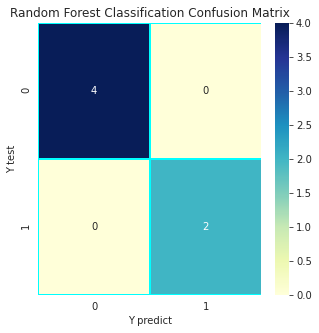

In [33]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [34]:
# Test score
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

1.0


6. K-Nearest Neighbor classification

K-Nearest Neighbour adalah teknik yang menyimpan semua kasus yang tersedia dan mengklasifikasikan kasus baru berdasarkan ukuran kesamaan (misalnya, fungsi jarak). Teknik ini non-parametrik karena tidak ada asumsi untuk distribusi data yang mendasarinya dan itu malas karena tidak memerlukan pembuatan model titik data pelatihan. Semua data latih digunakan pada tahap uji coba. Ini membuat pelatihan lebih cepat dan fase pengujian lebih lambat dan lebih mahal. Dalam teknik ini, jumlah tetangga k biasanya bilangan ganjil jika jumlah kelasnya adalah 2. Untuk mencari titik terdekat yang serupa, cari jarak antar titik menggunakan ukuran jarak seperti jarak Euclidean, jarak Hamming, jarak Manhattan dan jarak Minkowski.

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
knncla.fit(X_train, Y_train)

# We predict target values
Y_predict6 = knncla.predict(X_test)

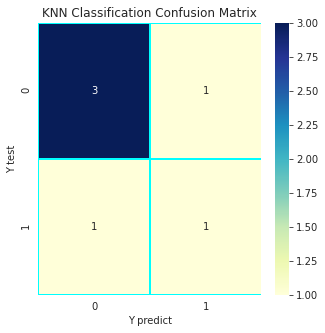

In [38]:
# The confusion matrix
knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [39]:
# Test score
score_knncla= knncla.score(X_test, Y_test)
print(score_knncla)

0.6666666666666666


**## Perbandingan teknik klasifikasi

Test Score

In [40]:
Testscores = pd.Series([score_logreg, score_svmcla, score_nbcla, score_dtcla, score_rfcla, score_knncla], 
                        index=['Logistic Regression Score', 'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Testscores)

Logistic Regression Score       1.000000
Support Vector Machine Score    1.000000
Naive Bayes Score               1.000000
Decision Tree Score             1.000000
Random Forest Score             1.000000
K-Nearest Neighbour Score       0.666667
dtype: float64


The confusion matrix

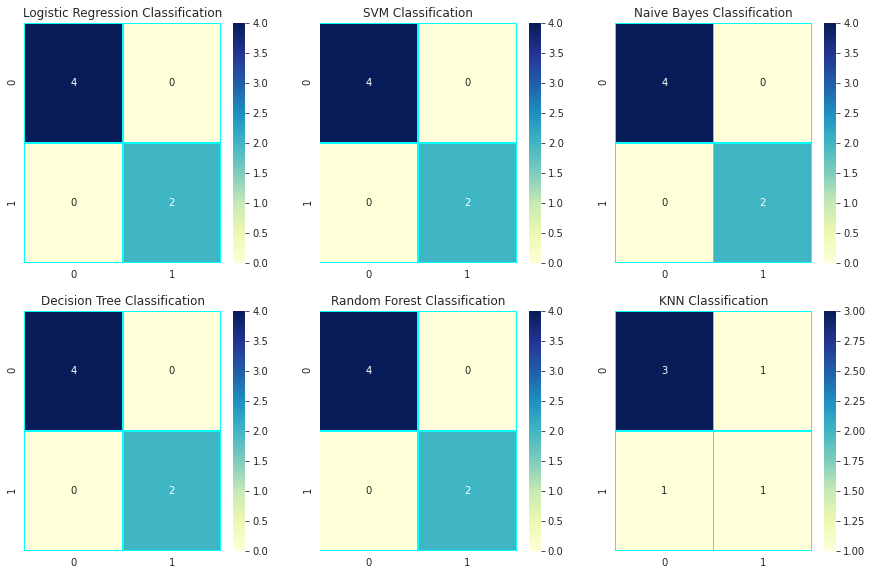

In [41]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Naive Bayes Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Decision Tree Classification')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Random Forest Classification')
ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('KNN Classification')
sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)  
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax4)
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax5)
sns.heatmap(data=knncla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax6)
plt.show()

ROC curve

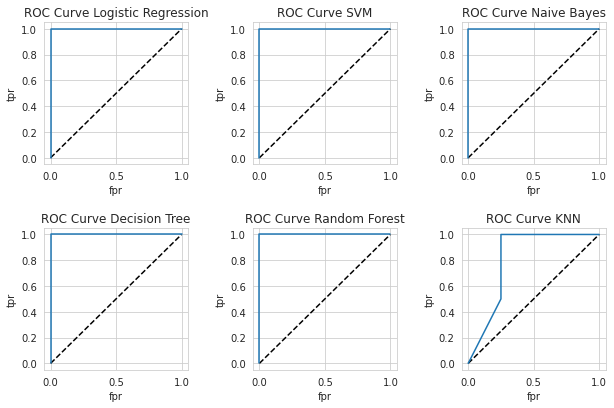

In [42]:
from sklearn.metrics import roc_curve

# Logistic Regression Classification
Y_predict1_proba = logreg.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict1_proba)
plt.subplot(331)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Logistic Regression')
plt.grid(True)

# SVM Classification
Y_predict2_proba = svmcla.predict_proba(X_test)
Y_predict2_proba = Y_predict2_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict2_proba)
plt.subplot(332)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve SVM')
plt.grid(True)

# Naive Bayes Classification
Y_predict3_proba = nbcla.predict_proba(X_test)
Y_predict3_proba = Y_predict3_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict3_proba)
plt.subplot(333)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.grid(True)

# Decision Tree Classification
Y_predict4_proba = dtcla.predict_proba(X_test)
Y_predict4_proba = Y_predict4_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict4_proba)
plt.subplot(334)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Decision Tree')
plt.grid(True)

# Random Forest Classification
Y_predict5_proba = rfcla.predict_proba(X_test)
Y_predict5_proba = Y_predict5_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict5_proba)
plt.subplot(335)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Random Forest')
plt.grid(True)

# KNN Classification
Y_predict6_proba = knncla.predict_proba(X_test)
Y_predict6_proba = Y_predict6_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict6_proba)
plt.subplot(336)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve KNN')
plt.grid(True)
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()

Features Selection

1. Di sini kami menghapus Age dari data1. Kami menggunakan fitur: Smoke, AreaQ, Alkhol

In [43]:
Y1 = data1['Result']
X1 = data1.drop(columns=['Age'])
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.06, penalty="l1", dual=False,random_state=10).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['Smokes', 'AreaQ', 'Alkhol']
3


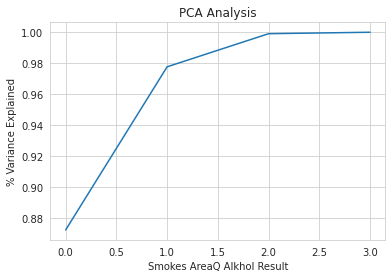

In [44]:
# Principal component analysis
from sklearn.decomposition import PCA

pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Smokes AreaQ Alkhol Result')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [47]:
# Percentage of total variance explained
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(1,5))) 
print(variance[10:90])

Series([], dtype: float64)


In [46]:
X1 = data1[cc] 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=10)

Klasifikasi dilakukan dengan menggunakan teknik yang dijelaskan di atas, di mana satu-satunya hal yang berubah adalah data pelatihan dan pengujian.

In [48]:
# Logistic regression classification
logreg.fit(X1_train, Y1_train)
Y1_predict1 = logreg.predict(X1_test)
logreg_cm = confusion_matrix(Y1_test, Y1_predict1)
score1_logreg = logreg.score(X1_test, Y1_test)

# SVM classification
svmcla.fit(X1_train, Y1_train)
Y1_predict2 = svmcla.predict(X1_test)
svmcla_cm = confusion_matrix(Y1_test, Y1_predict2)
score1_svmcla = svmcla.score(X1_test, Y1_test)

# Random forest classification
rfcla.fit(X1_train, Y1_train)
Y1_predict5 = rfcla.predict(X1_test)
rfcla_cm = confusion_matrix(Y1_test, Y1_predict5)
score1_rfcla = rfcla.score(X1_test, Y1_test)

Comparison of classification techniques

In [49]:
Testscores1 = pd.Series([score1_logreg, score1_svmcla, score1_rfcla], index=['Logistic Regression Score', 
                        'Support Vector Machine Score', 'Random Forest Score']) 
print(Testscores1)

Logistic Regression Score       1.0
Support Vector Machine Score    1.0
Random Forest Score             1.0
dtype: float64


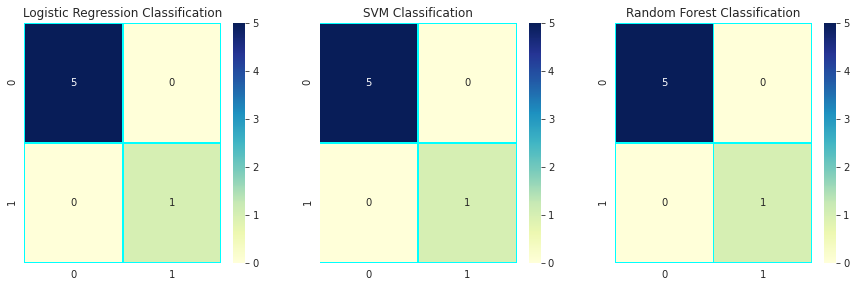

In [50]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax5 = fig.add_subplot(3, 3,3)
ax5.set_title('Random Forest Classification')

sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)  
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax5)
plt.show()

2. Kami menghapus AreaQ dari data1. Kami menggunakan fitur: Usia, Merokok, Alkhol

In [51]:
Y1 = data1['Result']
X1 = data1.drop(columns=['AreaQ'])
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.06, penalty="l1", dual=False,random_state=10).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['Age', 'Smokes', 'Alkhol', 'Result']
4


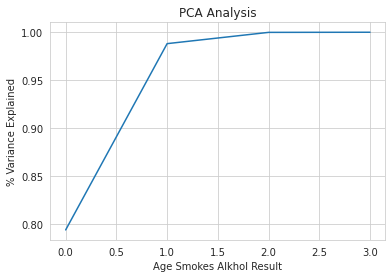

In [52]:
# Principal component analysis
from sklearn.decomposition import PCA

pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Age Smokes Alkhol Result')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [53]:
# Percentage of total variance explained
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(1,5))) 
print(variance[10:90])

Series([], dtype: float64)


In [54]:
X1 = data1[cc] 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=10)

Klasifikasi dilakukan dengan menggunakan teknik yang dijelaskan di atas, di mana satu-satunya hal yang berubah adalah data pelatihan dan pengujian.

In [55]:
# Logistic regression classification
logreg.fit(X1_train, Y1_train)
Y1_predict1 = logreg.predict(X1_test)
logreg_cm = confusion_matrix(Y1_test, Y1_predict1)
score1_logreg = logreg.score(X1_test, Y1_test)

# SVM classification
svmcla.fit(X1_train, Y1_train)
Y1_predict2 = svmcla.predict(X1_test)
svmcla_cm = confusion_matrix(Y1_test, Y1_predict2)
score1_svmcla = svmcla.score(X1_test, Y1_test)

# Random forest classification
rfcla.fit(X1_train, Y1_train)
Y1_predict5 = rfcla.predict(X1_test)
rfcla_cm = confusion_matrix(Y1_test, Y1_predict5)
score1_rfcla = rfcla.score(X1_test, Y1_test)

In [56]:
Testscores1 = pd.Series([score1_logreg, score1_svmcla, score1_rfcla], index=['Logistic Regression Score', 
                        'Support Vector Machine Score', 'Random Forest Score']) 
print(Testscores1)

Logistic Regression Score       1.0
Support Vector Machine Score    1.0
Random Forest Score             1.0
dtype: float64


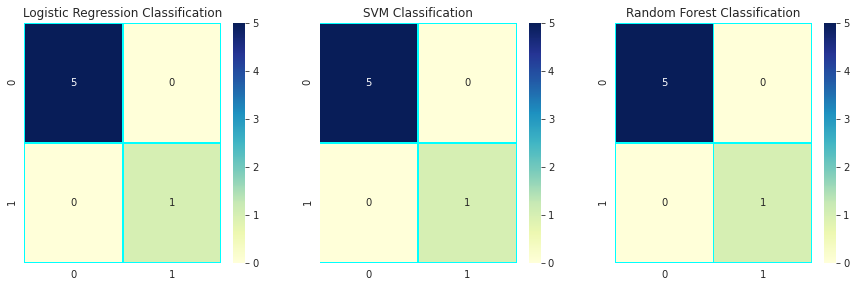

In [57]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax5 = fig.add_subplot(3, 3,3)
ax5.set_title('Random Forest Classification')
sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)  
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax5)
plt.show()

1. Kami menjatuhkan Alkhol dari data1. Kami menggunakan fitur: Usia, Merokok, AreaQ

In [58]:
Y1 = data1['Result']
X1 = data1.drop(columns=['Alkhol'])
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.06, penalty="l1", dual=False,random_state=10).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['Age', 'Smokes', 'AreaQ']
3


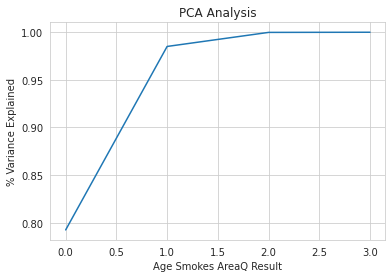

In [59]:
# Principal component analysis
from sklearn.decomposition import PCA

pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Age Smokes AreaQ Result')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [60]:
# Percentage of total variance explained
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(1,5))) 
print(variance[10:90])

Series([], dtype: float64)


Klasifikasi dilakukan dengan menggunakan teknik yang dijelaskan di atas, di mana satu-satunya hal yang berubah adalah data pelatihan dan pengujian.

In [61]:
# Logistic regression classification
logreg.fit(X1_train, Y1_train)
Y1_predict1 = logreg.predict(X1_test)
logreg_cm = confusion_matrix(Y1_test, Y1_predict1)
score1_logreg = logreg.score(X1_test, Y1_test)

# SVM classification
svmcla.fit(X1_train, Y1_train)
Y1_predict2 = svmcla.predict(X1_test)
svmcla_cm = confusion_matrix(Y1_test, Y1_predict2)
score1_svmcla = svmcla.score(X1_test, Y1_test)

# Random forest classification
rfcla.fit(X1_train, Y1_train)
Y1_predict5 = rfcla.predict(X1_test)
rfcla_cm = confusion_matrix(Y1_test, Y1_predict5)
score1_rfcla = rfcla.score(X1_test, Y1_test)

In [62]:
Testscores1 = pd.Series([score1_logreg, score1_svmcla, score1_rfcla], index=['Logistic Regression Score', 
                        'Support Vector Machine Score', 'Random Forest Score']) 
print(Testscores1)

Logistic Regression Score       1.0
Support Vector Machine Score    1.0
Random Forest Score             1.0
dtype: float64


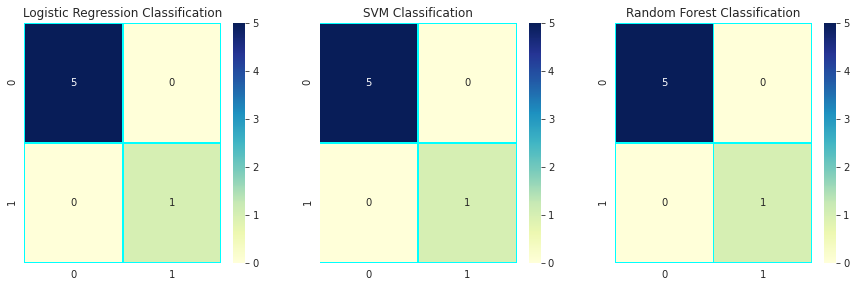

In [63]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax5 = fig.add_subplot(3, 3,3)
ax5.set_title('Random Forest Classification')
sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)  
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax5)
plt.show()